In [24]:
import torch
from torch import nn, optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import numpy as np
from matplotlib import pyplot as plt


In [25]:
transform = transforms.ToTensor()

In [26]:
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

In [27]:
train_loader = DataLoader(dataset=train_data, batch_size=20)
test_loader = DataLoader(dataset=test_data, batch_size=20)

In [28]:
class DeepAutoEncoder(nn.Module):

    def __init__(self):
        super().__init__()

        self.L1 = nn.Linear(in_features=784, out_features=128)
        self.L2 = nn.Linear(in_features=128, out_features=64)
        self.L3 = nn.Linear(in_features=64, out_features=32)
        self.L4 = nn.Linear(in_features=32, out_features=64)
        self.L5 = nn.Linear(in_features=64, out_features=128)
        self.L6 = nn.Linear(in_features=128, out_features=784)


    def forward(self, x):
        x = torch.relu(self.L1(x))
        x = torch.relu(self.L2(x))
        x = torch.relu(self.L3(x))
        x = torch.relu(self.L4(x))
        x = torch.relu(self.L5(x))
        x = torch.sigmoid(self.L6(x))

        return x

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [30]:
model = DeepAutoEncoder()
model.to(device)

DeepAutoEncoder(
  (L1): Linear(in_features=784, out_features=128, bias=True)
  (L2): Linear(in_features=128, out_features=64, bias=True)
  (L3): Linear(in_features=64, out_features=32, bias=True)
  (L4): Linear(in_features=32, out_features=64, bias=True)
  (L5): Linear(in_features=64, out_features=128, bias=True)
  (L6): Linear(in_features=128, out_features=784, bias=True)
)

In [31]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
EPOCHS = 50

In [32]:
for epoch in range(EPOCHS):

    train_loss = 0

    for images, labels in train_loader:
        images = images.view(20, -1).to(device)

        pred = model(images)

        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            loss = criterion(pred, images)
            loss.backward()
            optimizer.step()

    train_loss += loss.item()
    print(f'Epoch{epoch}: loss={loss}')


Epoch0: loss=0.025624550879001617
Epoch1: loss=0.01995372213423252
Epoch2: loss=0.017032470554113388
Epoch3: loss=0.015488925389945507
Epoch4: loss=0.014665945433080196
Epoch5: loss=0.014152314513921738
Epoch6: loss=0.012829124927520752
Epoch7: loss=0.012057963758707047
Epoch8: loss=0.011671086773276329
Epoch9: loss=0.011036213487386703
Epoch10: loss=0.010731050744652748
Epoch11: loss=0.010416707955300808
Epoch12: loss=0.010283205658197403
Epoch13: loss=0.010046984069049358
Epoch14: loss=0.009850818663835526
Epoch15: loss=0.009771144017577171
Epoch16: loss=0.009535056538879871
Epoch17: loss=0.00933748111128807
Epoch18: loss=0.009095528163015842
Epoch19: loss=0.008787427097558975
Epoch20: loss=0.008581542409956455
Epoch21: loss=0.008506556041538715
Epoch22: loss=0.008331423625349998
Epoch23: loss=0.008330008015036583
Epoch24: loss=0.008175746537744999
Epoch25: loss=0.008027489297091961
Epoch26: loss=0.007995293475687504
Epoch27: loss=0.007909630425274372
Epoch28: loss=0.0078775649890303

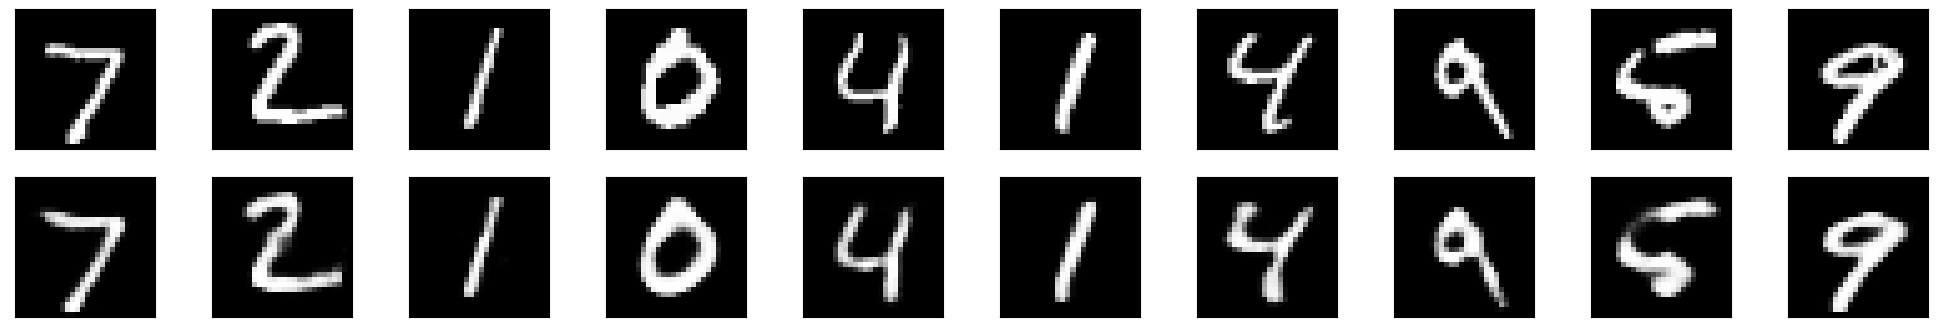

In [33]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)

images_flatten = images.view(images.size(0), -1)

output = model(images_flatten)

images = images.detach().cpu().numpy()

output = output.view(20, 1, 28, 28)

output = output.detach().cpu().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)